## SESSION 20 : ASSIGNMENT 1 

###### BUILD LINEAR REGRESSION MODEL USING SCIKIT LEARN IN BOSTON DATA TO
###### PREDICT PRICE

In [22]:
## importing packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [23]:
## importing boston dataset
from sklearn.datasets import load_boston

In [24]:
## reading dataset to variable
boston=load_boston()

In [25]:
##Analyzing dataset
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      in

In [26]:
bos=pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [27]:
## Adding columns
bos.columns=boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [28]:
## Adding target as price to the dataset
print(boston.target.shape)
bos['PRICE']=boston.target
print(bos.head())

(506,)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [29]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [30]:
##Split train test dataset
X=bos.drop('PRICE',axis=1).values
y=bos['PRICE'].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state=0)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [33]:
from sklearn.linear_model import LinearRegression
liner_regressor=LinearRegression()
liner_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
y_pred=liner_regressor.predict(X_test)

In [35]:
y_pred

array([25.05723954, 24.05970464, 29.26948567, 12.08008654, 21.18910679,
       19.15481043, 20.75645997, 21.1357019 , 19.33331951, 20.43736207,
        5.74247784, 16.91358809, 17.04690781,  5.35757611, 40.28155608,
       32.47297998, 22.58395424, 36.70550432, 31.30307521, 23.28027912,
       24.70768647, 24.60652801, 20.57632979, 30.66163745, 22.35211431,
       10.94647988, 17.19763797, 18.27238756, 35.4952486 , 20.68111807,
       18.21374126, 17.70506227, 19.05340692, 23.54337543, 29.11696827,
       19.55613467, 10.87071119, 25.23361168, 18.14988338, 15.36647627,
       26.219471  , 20.68230234, 22.19934882, 15.57280169, 22.49057058,
       24.73804557, 19.45267657, 22.96379215,  9.51744327, 24.26508158,
       21.53366403, 17.55033369, 24.4618293 , 29.48665353, 13.3285441 ,
       21.41911232, 20.49930252, 14.68762709, 15.02308948, 21.84030704,
       16.94955503, 21.40634496, 33.13758498, 31.68204286, 17.94613422,
       33.16534256, 18.54065207, 18.68385778, 19.3423729 , 23.11

In [36]:
## CHECKING THE CONFIDENCE 
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.6706735236307437


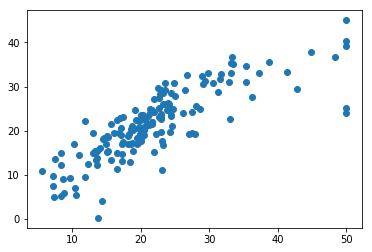

In [37]:
plt.scatter(y_test,y_pred)